# Brain Observatory dataset

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy
import pickle as pkl
import ipywidgets as widgets
from mpl_toolkits import mplot3d
from scipy import sparse
import sys
sys.path.insert(0, '../model/')
sys.path.insert(0, 'model')

import collections
collections.Callable = collections.abc.Callable

In [2]:
with open('dump.pkl', 'rb') as f:
    gl = pkl.load(f)
    for key in gl:
        globals()[key] = gl[key]

In [ ]:
with open('masks.pkl', 'rb') as f:
    masks = pkl.load(f)

In [38]:
globals().keys()

dict_keys(['__name__', '__doc__', '__package__', '__loader__', '__spec__', '__builtin__', '__builtins__', '_ih', '_oh', '_dh', 'In', 'Out', 'get_ipython', 'exit', 'quit', '_', '__', '___', 'sys', 'os', '__vsc_ipynb_file__', '_i', '_ii', '_iii', '_i1', 'f', '_i2', 'np', 'plt', 'pd', 'scipy', 'pkl', 'widgets', 'mplot3d', 'sparse', 'collections', '_i3', '_i4', '_i5', 'dill', 'gl', 'key', '_i6', '_i7', 'Axes3D', 'fig', 'ax', '_i8', 'ncomp_umap', '_i9', 'UMAP', '_i10', '_i11', '_i12', '_i13', '_i14', 'BrainObservatoryCache', 'pprint', 'boc', 'targeted_structures', '_i15', 'stim_info', 'exp_noise', 'exp_scenes', 'exp_gratings', '_i16', 'LocallySparseNoise', 'noise_data', '_i17', 'cont_ids_noise', 'cont_ids_scenes', 'cells_noise', 'cells_scenes', 'cell_ids', 'cells', 'specimen_ids', 'cells_by_specimen', '_17', '_i18', 'cont_ids_gratings', 'cells_gratings', '_i19', '_19', '_i20', '_20', '_i21', 'get_cell', 'get_noise_exp_for_cell', 'get_scene_exp_for_cell', 'get_grating_exp_for_cell', '_i22', 

In [20]:
import pickle
with open('dump.pkl', 'wb') as f:
    pickle.dump({k: globals()[k] for k in [
        'boc', 'exp_noise', 'exp_scenes', 'exp_gratings', 'noise_data', 'cont_ids_noise', 'cont_ids_scenes', 
        'cells_noise', 'cells_scenes', 'cell_ids', 'cells', 'specimen_ids', 'cont_ids_gratings', 'cells_gratings', 'exp_1', 'exp_1_', 'resp_nat', 'ids_exp_1', 
        'first_cell_ids', 'broken_exps', 'cell_ids_exp', 'masks_for_exp', 'roi_centers', 'exp_conts', 'cells_by_exp',
        'cells_by_exp_and_region', 'max_exp_id', 'cells_chosen', 'resp_gr', 'exp_ch_gratings', 
        'exp_ch_scenes', 'exp_ch_scenes_', 'embed', 'ch_cells_inds', 'resp_gr_flat',
        'resp_nat', 'stim_table', 'stim_ori', 'stim_ph', 'stim_freq', 'embed_gr', 'embed_nat'
        ]}, f)

In [5]:
from allensdk.core.brain_observatory_cache import BrainObservatoryCache
import pprint

# This class uses a 'manifest' to keep track of downloaded data and metadata.  
# All downloaded files will be stored relative to the directory holding the manifest
# file.  If 'manifest_file' is a relative path (as it is below), it will be 
# saved relative to your working directory.  It can also be an absolute path.
boc = BrainObservatoryCache()

# Download a list of all targeted areas
targeted_structures = boc.get_all_targeted_structures()
print("all targeted structures: " + str(targeted_structures))

all targeted structures: ['VISal', 'VISam', 'VISl', 'VISp', 'VISpm', 'VISrl']


In [3]:
cre_lines = boc.get_all_cre_lines()
print("all cre lines:\n")
pprint.pprint(cre_lines)

all cre lines:

['Cux2-CreERT2',
 'Emx1-IRES-Cre',
 'Fezf2-CreER',
 'Nr5a1-Cre',
 'Ntsr1-Cre_GN220',
 'Pvalb-IRES-Cre',
 'Rbp4-Cre_KL100',
 'Rorb-IRES2-Cre',
 'Scnn1a-Tg3-Cre',
 'Slc17a7-IRES2-Cre',
 'Sst-IRES-Cre',
 'Tlx3-Cre_PL56',
 'Vip-IRES-Cre']


In [4]:
import allensdk.brain_observatory.stimulus_info as stim_info

# pick one of the cux2 experiment containers
# cux2_ec_id = cux2_ecs[-1]['id']

exp_noise = boc.get_ophys_experiments(stimuli=[stim_info.LOCALLY_SPARSE_NOISE])
exp_scenes = boc.get_ophys_experiments(stimuli=[stim_info.NATURAL_SCENES])
exp_gratings = boc.get_ophys_experiments(stimuli=[stim_info.STATIC_GRATINGS])
print(f"Experiment with scenes: {len(exp_scenes)}, with noise: {len(exp_noise)}")
pprint.pprint(exp_noise[0])
pprint.pprint(exp_scenes[0])

Experiment with scenes: 456, with noise: 76
{'acquisition_age_days': 98,
 'cre_line': 'Cux2-CreERT2',
 'donor_name': '225037',
 'experiment_container_id': 511510699,
 'fail_eye_tracking': True,
 'id': 502974807,
 'imaging_depth': 275,
 'reporter_line': 'Ai93(TITL-GCaMP6f)',
 'session_type': 'three_session_C',
 'specimen_name': 'Cux2-CreERT2;Camk2a-tTA;Ai93-225037',
 'targeted_structure': 'VISp'}
{'acquisition_age_days': 124,
 'cre_line': 'Slc17a7-IRES2-Cre',
 'donor_name': '361636',
 'experiment_container_id': 662358769,
 'fail_eye_tracking': False,
 'id': 663488086,
 'imaging_depth': 175,
 'reporter_line': 'Ai93(TITL-GCaMP6f)',
 'session_type': 'three_session_B',
 'specimen_name': 'Slc17a7-IRES2-Cre;Camk2a-tTA;Ai93-361636',
 'targeted_structure': 'VISl'}


In [7]:
from allensdk.brain_observatory.locally_sparse_noise import LocallySparseNoise

noise_data = np.array([LocallySparseNoise(exp['id']) for exp in exp_noise])

In [6]:
cont_ids_noise = [exp['experiment_container_id'] for exp in exp_noise]
cont_ids_scenes = [exp['experiment_container_id'] for exp in exp_scenes]
cells_noise = boc.get_cell_specimens(experiment_container_ids=cont_ids_noise)
cells_scenes = boc.get_cell_specimens(experiment_container_ids=cont_ids_scenes)
cell_ids = np.array(list(set(cell['cell_specimen_id'] for cell in cells_noise).intersection(set(cell['cell_specimen_id'] for cell in cells_scenes))))
cells = [c for c in cells_noise if c['cell_specimen_id'] in cell_ids]
specimen_ids = list(sorted(set([c['cell_specimen_id'] for c in cells])))
cells_by_specimen = [[c for c in cells if c['cell_specimen_id'] == specimen_id] for specimen_id in specimen_ids]
len(cells)

KeyboardInterrupt: 

In [7]:
cont_ids_gratings = [exp['experiment_container_id'] for exp in exp_gratings]
cells_gratings = boc.get_cell_specimens(experiment_container_ids=cont_ids_gratings)

In [8]:
len(exp_noise), len(exp_scenes), len(cells_noise), len(cells_scenes), len(set(cell['cell_specimen_id'] for cell in cells_noise).intersection(set(cell['cell_specimen_id'] for cell in cells_scenes))), len(cell_ids)

(76, 456, 17546, 63251, 17546, 17546)

In [31]:
len(cont_ids_noise), len(cont_ids_scenes), len(cont_ids_gratings), len(set(cont_ids_noise).intersection(set(cont_ids_scenes).intersection(set(cont_ids_gratings))))

(76, 456, 456, 76)

In [9]:
cells_noise[0].keys()

dict_keys(['all_stim', 'area', 'cell_specimen_id', 'donor_full_genotype', 'dsi_dg', 'experiment_container_id', 'failed_experiment_container', 'g_dsi_dg', 'g_osi_dg', 'g_osi_sg', 'image_sel_ns', 'imaging_depth', 'osi_dg', 'osi_sg', 'p_dg', 'p_ns', 'p_run_mod_dg', 'p_run_mod_ns', 'p_run_mod_sg', 'p_sg', 'peak_dff_dg', 'peak_dff_ns', 'peak_dff_sg', 'pref_dir_dg', 'pref_image_ns', 'pref_ori_sg', 'pref_phase_sg', 'pref_sf_sg', 'pref_tf_dg', 'reliability_dg', 'reliability_nm1_a', 'reliability_nm1_b', 'reliability_nm1_c', 'reliability_nm2', 'reliability_nm3', 'reliability_ns', 'reliability_sg', 'rf_area_off_lsn', 'rf_area_on_lsn', 'rf_center_off_x_lsn', 'rf_center_off_y_lsn', 'rf_center_on_x_lsn', 'rf_center_on_y_lsn', 'rf_chi2_lsn', 'rf_distance_lsn', 'rf_overlap_index_lsn', 'run_mod_dg', 'run_mod_ns', 'run_mod_sg', 'sfdi_sg', 'specimen_id', 'tfdi_dg', 'time_to_peak_ns', 'time_to_peak_sg', 'tld1_id', 'tld1_name', 'tld2_id', 'tld2_name', 'tlr1_id', 'tlr1_name'])

In [8]:
get_cell = lambda cell_id: [c for c in cells if c['cell_specimen_id'] == cell_id][0]
get_noise_exp_for_cell = lambda cell_id: exp_noise[cont_ids_noise.index(get_cell(cell_id)['experiment_container_id'])]
get_scene_exp_for_cell = lambda cell_id: exp_scenes[cont_ids_scenes.index(get_cell(cell_id)['experiment_container_id'])]
get_grating_exp_for_cell = lambda cell_id: exp_gratings[cont_ids_gratings.index(get_cell(cell_id)['experiment_container_id'])]

### Get receptive field centers

In [11]:
exp_1 = boc.get_ophys_experiment_data(get_noise_exp_for_cell(cell_ids[0])['id'])

In [12]:
np.where(cell_ids == cell_ids[0])[0][0]

0

In [13]:
first_cell_ids = [cell['cell_specimen_id'] for cell in cells if cell['experiment_container_id'] == cells[0]['experiment_container_id']]

In [14]:
first_cell_ids = list(set(exp_1.get_cell_specimen_ids()).intersection(cell_ids))
len(first_cell_ids), len(exp_1.get_cell_specimen_ids())

(254, 254)

In [15]:
exp_conts = list(set([cell['experiment_container_id'] for cell in cells]))
cells_by_exp = [[c for c in cells if c['experiment_container_id'] == exp_cont] for exp_cont in exp_conts]

In [9]:
first_masks = exp_1.get_roi_mask(cell_specimen_ids=first_cell_ids)

ValueError: Cell specimen not found (589168640 is not in list)

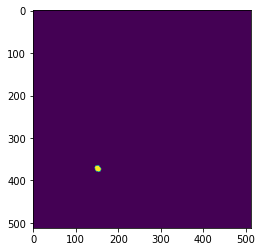

In [17]:
plt.imshow(first_masks[199].get_mask_plane())

In [18]:
masks = dict()
broken_exps = []
for cell_id in cell_ids:
    if masks.get(cell_id) is None:
        exp_id = get_noise_exp_for_cell(cell_id)['id']
        if exp_id in broken_exps:
            continue
        try:
            exp = boc.get_ophys_experiment_data(exp_id)
        except:
            broken_exps.append(exp_id)
            continue
        cell_ids_exp = exp.get_cell_specimen_ids()
        masks_for_exp = exp.get_roi_mask(cell_specimen_ids=cell_ids_exp)
        for i, cell_id_ in enumerate(cell_ids_exp):
            masks[cell_id_] = masks_for_exp[i].get_mask_plane()

2022-08-02 22:22:11,323 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/well_known_file_download/514427284


KeyboardInterrupt: 

In [19]:
import pickle
with open('masks.pkl', 'wb') as f:
    pickle.dump(masks, f)

In [21]:
len(masks)

6264

In [17]:
exp_cont_ids_masks = list(set([get_cell(k)['experiment_container_id'] for k in masks]))
len(exp_cont_ids_masks)

42

In [21]:
roi_centers = {cell_id: np.unravel_index(np.argmax(masks[cell_id], axis=None), masks[cell_id].shape) for cell_id in masks}

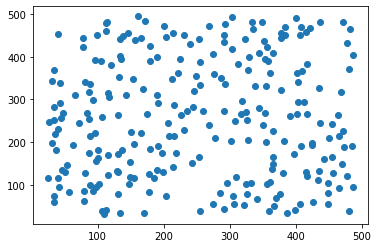

In [22]:
roi_cent_values = np.array([roi_centers[k] for k in first_cell_ids])
plt.scatter(roi_cent_values[:, 0], roi_cent_values[:, 1])

In [23]:
len(first_cell_ids), len(roi_cent_values), len(cell_ids), len(cells), len(exp_1.get_cell_specimen_ids())

(254, 254, 17546, 17546, 254)

**Split cells into groups**

Probably take regions with high concentrations and work only with them

In [26]:
s = 75
s_x, s_y = masks[cell_ids[0]].shape[0] // s + 1, masks[cell_ids[0]].shape[1] // s + 1
# grid = np.array([[x, y] for x in np.arange(0, masks[cell_ids[0]].shape[0], s) for y in np.arange(0, masks[cell_ids[0]].shape[1], s)])

In [27]:
cells_by_exp_and_region = [[[[] for _ in range(s_y)] for _ in range(s_x)] for cont_id in exp_cont_ids_masks]
for i, cell in enumerate(cells):
    if cell['cell_specimen_id'] not in masks:
        continue
    x, y = roi_centers[cell['cell_specimen_id']]
    exp_id_cell = cell['experiment_container_id']
    exp_id_cell = exp_cont_ids_masks.index(exp_id_cell)
    cells_by_exp_and_region[exp_id_cell][x // s][y // s].append(cell)

In [29]:
max_cells_exp_i = np.argmax([np.max([len(cells_by_exp_and_region[i][x][y]) for x in range(s_x) for y in range(s_y)]) for i in range(len(exp_cont_ids_masks))])
max_exp_id = exp_cont_ids_masks[max_cells_exp_i]
chosen_i, chosen_j = np.unravel_index(np.argmax([[len(cells_by_exp_and_region[max_cells_exp_i][x][y]) for x in range(s_x) for y in range(s_y)]]), [s_x, s_y])
cells_chosen = cells_by_exp_and_region[max_cells_exp_i][chosen_i][chosen_j]
np.max([len(cells_by_exp_and_region[max_cells_exp_i][x][y]) for x in range(s_x) for y in range(s_y)]), len(cells_chosen)

(16, 16)

In [11]:
num_cells_first = [sum(x <= roi_centers[k][0] < x + s and y <= roi_centers[k][1] < y + s for k in first_cell_ids if k in roi_centers) for x, y in grid]
i_max = np.argmax(num_cells_first)
grid[i_max], num_cells_first[i_max]

(array([100, 100]), 21)

In [12]:
x, y = grid[i_max]
cells_1 = [cell_id for cell_id in first_cell_ids if x <= roi_centers[cell_id][0] < x + s and y <= roi_centers[cell_id][1] < y + s]

### Static gratings

In [27]:
from allensdk.brain_observatory.static_gratings import StaticGratings

In [28]:
exp_ch_gratings = exp_gratings[cont_ids_gratings.index(max_exp_id)]
exp_ch_gratings = boc.get_ophys_experiment_data(exp_ch_gratings['id'])
exp_ch_gratings_ = StaticGratings(exp_ch_gratings)

In [9]:
ch_cells_inds = exp_ch_gratings.get_cell_specimen_indices([c['cell_specimen_id'] for c in cells_chosen if c['cell_specimen_id'] in exp_ch_gratings.get_cell_specimen_ids()])
len(ch_cells_inds)

12

In [42]:
resp_gr = exp_ch_gratings_.get_response()

In [46]:
resp_gr.shape

(6, 6, 4, 360, 3)

In [47]:
ch_cells_inds

[310, 8, 246, 269, 272, 118, 337, 356, 120, 273, 3, 45]

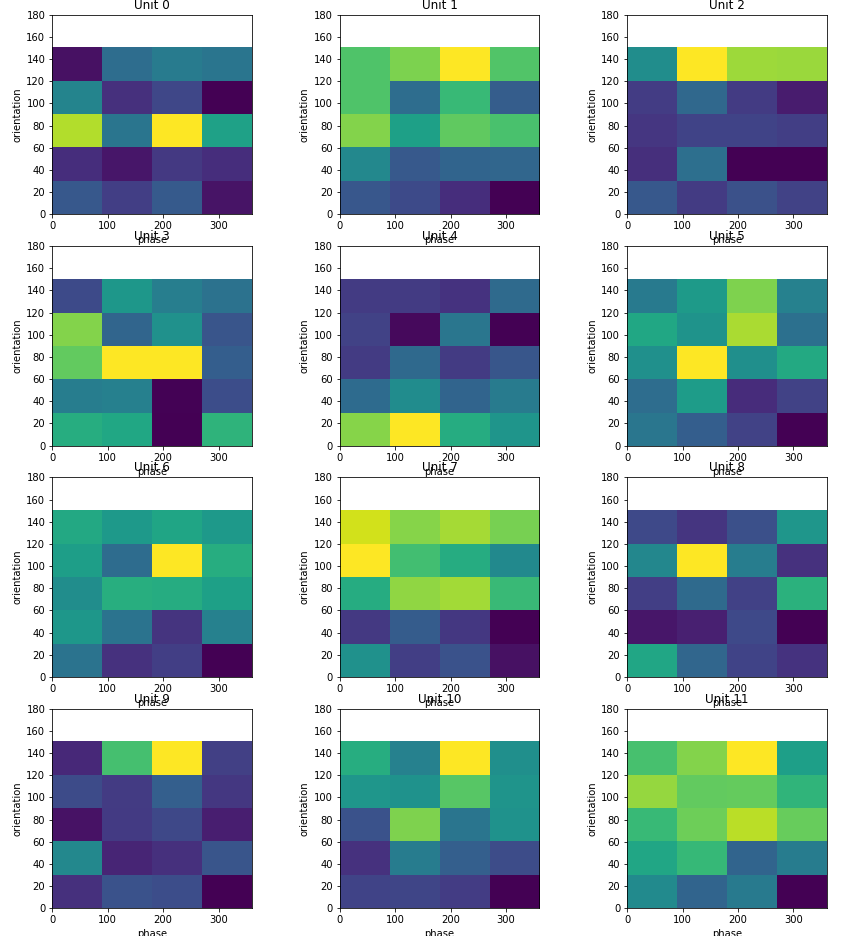

In [60]:
fig, axs = plt.subplots(4, 3, figsize=(12, 13))
fig.tight_layout(w_pad=2)
for i, ax in enumerate(axs.flatten()):
    ax.imshow(resp_gr[:, :, :, i, 0].mean(axis=0), extent=(0, 360, 0, 180), aspect=2)
    ax.set(xlabel="phase", ylabel="orientation", title=f"Unit {i}")
# plt.imshow(resp_gr[:, :, :, 0, 0].mean(axis=2))

In [12]:
resp_gr_ = np.array([resp_gr[:, :, :, i, 0] for i in ch_cells_inds]).swapaxes(0, 3)
resp_gr_flat = resp_gr_.reshape((-1, resp_gr_.shape[-1]))
resp_gr_.shape, resp_gr_flat.shape

((4, 6, 6, 12), (144, 12))

In [39]:
exp_ch_gratings_.stim_table.max()

orientation             150.00
spatial_frequency         0.32
phase                     0.75
start                113616.00
end                  113623.00
dtype: float64

In [14]:
stim_table = np.array([[[(ori, freq, ph) for ph in np.linspace(0, 0.75, 6)] for freq in np.linspace(0, 0.32, 6)] for ori in np.linspace(0, 150, 4)]).reshape((-1, 3))

In [15]:
nan_filt = ~np.isnan(resp_gr_flat).any(axis=1)
stim_ori, stim_ph, stim_freq = stim_table[nan_filt, 0], stim_table[nan_filt, 2], stim_table[nan_filt, 1]
resp_gr_flat = resp_gr_flat[nan_filt, :]
resp_gr_flat.shape

(121, 12)

### Get activity for natural images

In [8]:
exp_ch_scenes = exp_scenes[cont_ids_scenes.index(max_exp_id)]
exp_ch_scenes = boc.get_ophys_experiment_data(exp_ch_scenes['id'])

In [9]:
from allensdk.brain_observatory.natural_scenes import NaturalScenes

In [10]:
exp_ch_scenes_ = NaturalScenes(exp_ch_scenes)

In [11]:
resp_nat = exp_ch_scenes_.get_response()

In [15]:
resp_nat.shape

(119, 360, 3)

In [17]:
(exp_ch_scenes.get_cell_specimen_ids() == exp_ch_gratings.get_cell_specimen_ids()).all()

True

In [34]:
ids_exp_1 = exp_1.get_cell_specimen_ids()
cells_1_inds = [i for i in range(len(ids_exp_1)) if ids_exp_1[i] in cells_1]
len(cells_1_inds), len(cells_1)

(11, 21)

In [6]:
activity_1 = np.array([resp_nat[:, i, 0] for i in ch_cells_inds]).swapaxes(0, 1)
activity_1.shape

(119, 12)

### UMAP and stuff

In [6]:
from umap import UMAP

/usr/lib/python3.10/site-packages/numba/core/cpu.py:97: UserWarning: Numba extension module 'awkward._connect._numba' failed to load due to 'AttributeError(module 'setuptools' has no attribute 'extern')'.
  numba.core.entrypoints.init_all()


In [16]:
ncomp_umap = 4
embed = UMAP(n_components=ncomp_umap, n_neighbors=60, metric='euclidean').fit_transform(np.concatenate((activity_1, resp_gr_flat)))
embed_nat, embed_gr = embed[:len(activity_1), :], embed[len(activity_1):, :]

In [7]:
embed_nat, embed_gr = embed[:len(activity_1), :], embed[len(activity_1):, :]

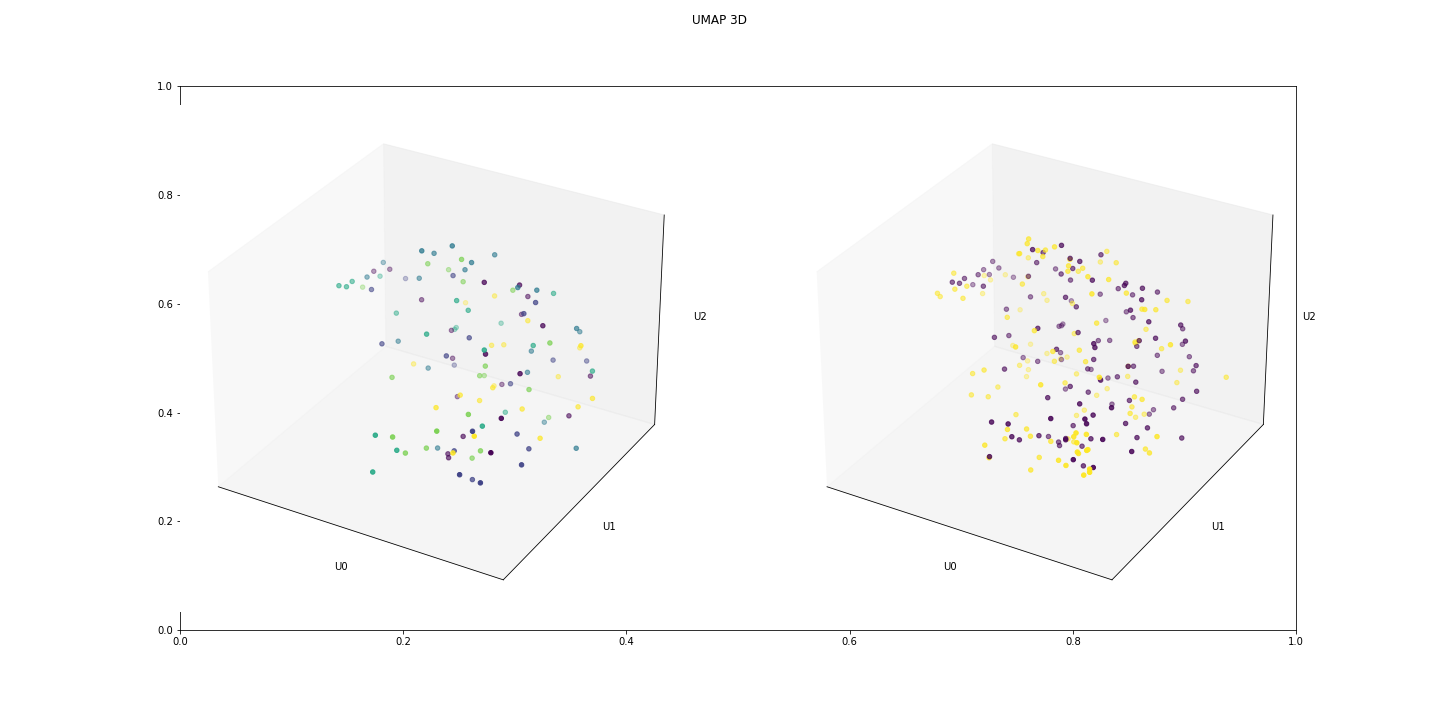

In [52]:
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline
%matplotlib widget

# x, y, z, u = embed[:,0], embed[:,1], embed[:,2], embed[:,3]    

fig, ax = plt.subplots(1, 1, figsize=(20, 10))
# ax.scatter3D(x, y, z, c=np.array([param_corr[:, 0] / 180, [0] * param_corr.shape[0], param_corr[:, 1] / 360]).swapaxes(0, 1))
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.scatter3D(embed_gr[:,0], embed_gr[:,1], embed_gr[:,2], c=stim_freq)
ax.set(xlabel="U0", ylabel="U1", zlabel="U2", xticks=[], yticks=[], zticks=[])
ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.scatter3D(embed[:,0], embed[:,1], embed[:,2], c=[1] * len(activity_1) + list(0 * stim_ph))
ax.set(xlabel="U0", ylabel="U1", zlabel="U2", xticks=[], yticks=[], zticks=[])
# ax = fig.add_subplot(2, 2, 3, projection='3d')
# ax.scatter3D(x, y, u, c=param_corr[:, 0], cmap="hsv")
# ax.set(xlabel="U0", ylabel="U1", zlabel="U3", xticks=[], yticks=[], zticks=[])
# ax = fig.add_subplot(2, 2, 4, projection='3d')
# ax.scatter3D(x, y, u, c=param_corr[:, 1], cmap="hsv")
# ax.set(xlabel="U0", ylabel="U1", zlabel="U3", xticks=[], yticks=[], zticks=[])
fig.suptitle('UMAP 3D')
plt.show()

#### Persistence

In [3]:
from persistence import persistence

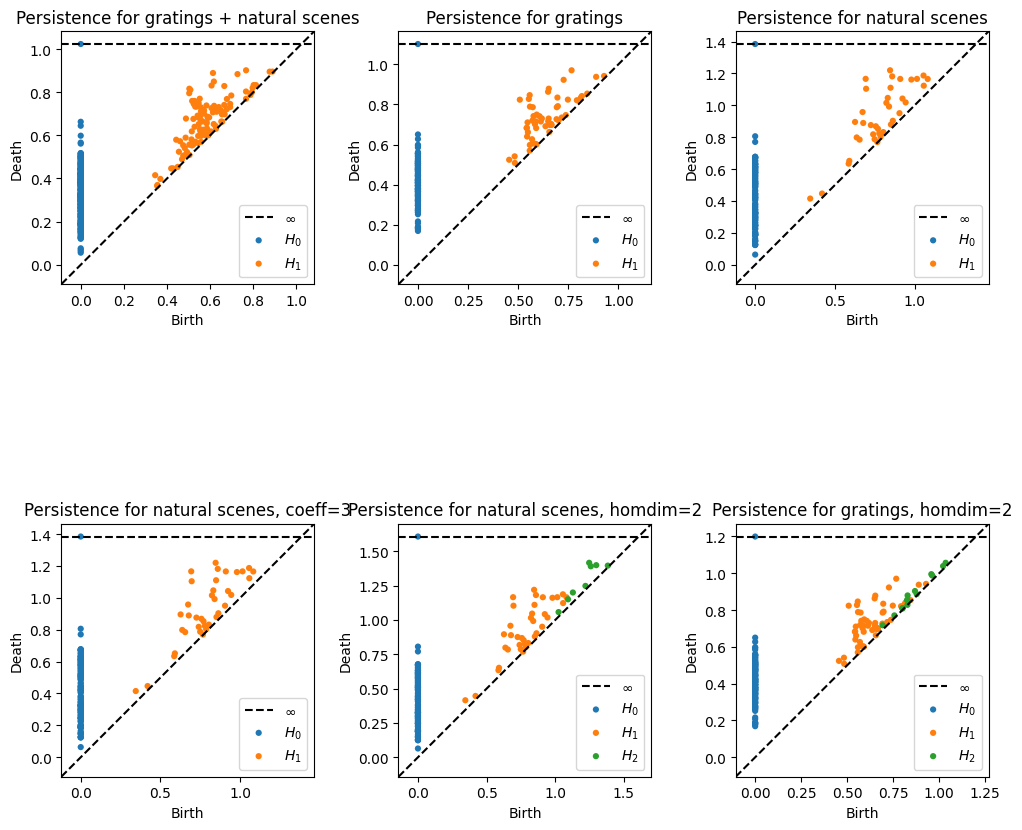

In [12]:
fig, ax = plt.subplots(2, 3, figsize=(10, 10))
fig.tight_layout(w_pad=3)
ax = ax.flatten()
ax[0].set_title('Persistence for gratings + natural scenes')
persistence(embed, ax=ax[0])
ax[1].set_title('Persistence for gratings')
persistence(embed_gr, ax=ax[1])
ax[2].set_title('Persistence for natural scenes')
persistence(embed_nat, ax=ax[2])
ax[3].set_title('Persistence for natural scenes, coeff=3')
persistence(embed_nat, coeff=3, ax=ax[3])
ax[4].set_title('Persistence for natural scenes, homdim=2')
persistence(embed_nat, homdim=2, ax=ax[4])
ax[5].set_title('Persistence for gratings, homdim=2')
persistence(embed_gr, homdim=2, ax=ax[5])

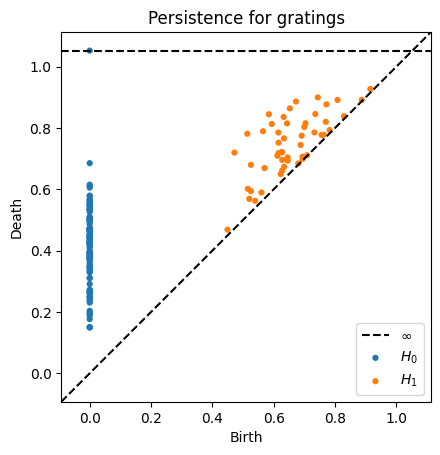

In [71]:
plt.title('Persistence for gratings')
persistence(embed_gr)

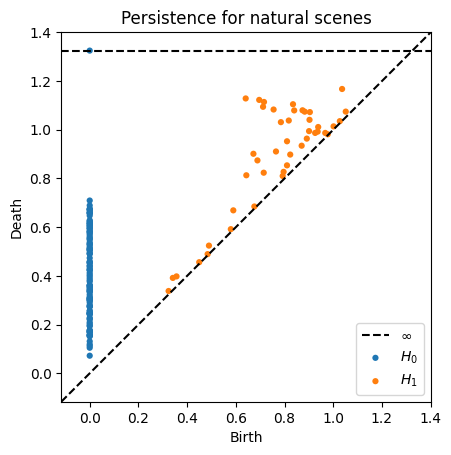

In [72]:
plt.title('Persistence for natural scenes')
persistence(embed_nat)

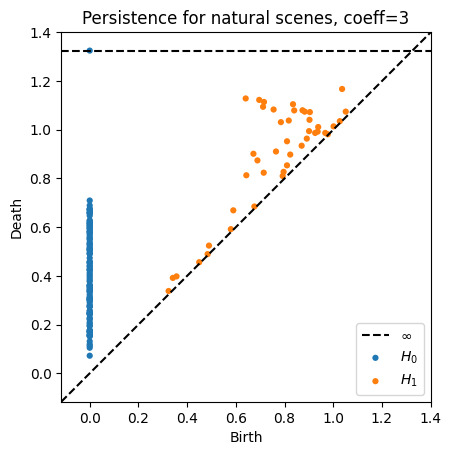

In [75]:
plt.title('Persistence for natural scenes, coeff=3')
persistence(embed_nat, coeff=3)